## K-means step-by-step as intuitively as possible

This notebook looks to outline the steps of doing k-means with 2 dimensional data. The code is written to be close to the underlying maths rather than being efficient.

The data is generated from 4 Gaussian distributions in 2 dimensions. 



In [0]:
# Imports 
import numpy as np
import matplotlib.pyplot as plt

Now we want to generate some data- you can use a built-in package for this, but it may be preferable to generate these directly if you want more transparency. You can also play with the parameters here to see how long they take to converge/whether they match, etc.
The mean vectors are roughly in the corners of a 2 square in the plane.

In [163]:
# Generate some points
mean_distance_scale = 6
dist_1 = np.random.multivariate_normal([0,0],[[0.1,-0.09],[-0.09,0.1]],20)
dist_2 = np.random.multivariate_normal([2/mean_distance_scale,8/mean_distance_scale],[[0.1,0.06],[0.06,0.1]],20)
dist_3 = np.random.multivariate_normal([8/mean_distance_scale,1/mean_distance_scale],[[0.1,0],[0,0.1]],20)
dist_4 = np.random.multivariate_normal([10/mean_distance_scale,10/mean_distance_scale],[[0.1,0.01],[0.01,0.1]],20)

# Plot the distributions
plt.scatter(dist_1[:,0],dist_1[:,1],color='blue')
plt.scatter(dist_2[:,0],dist_2[:,1],color='red')
plt.scatter(dist_3[:,0],dist_3[:,1],color='green')
plt.scatter(dist_4[:,0],dist_4[:,1],color='purple')
plt.title('Scatterplot of distinct distributions')


Text(0.5, 1.0, 'Scatterplot of distinct distributions')

Below is a plot of what we might be able to see if we received data that we were to cluster ourselves

In [142]:
# Join the distributions and plot together
X = np.concatenate([dist_1,dist_2,dist_3,dist_4],axis = 0)

plt.scatter(X[:,0],X[:,1],color='blue')
plt.title('Scatterplot of the grouped distributions')

Text(0.5, 1.0, 'Scatterplot of the grouped distributions')

Alright so now we have our data points. Note, of course,
that the first multicoloured plot is not available to use in real life- we don't know the underlying distributions that are generating this data. 
That's why we need to learn them, which is what we are going to do below.
We will start by randomly choosing points to be the centers of our clusters.
Then we will assign each point to the nearest cluster center.
Then we will re-calculate the cluster centers as the average of the points associated with that cluster.

In [0]:
# K- means algorithm itself
# First generate the centers

NUMBER_OF_CENTERS = 4
centers_x1 = np.random.uniform(low = np.min(X[:,0]),high = np.max(X[:,0]),size=NUMBER_OF_CENTERS).reshape(NUMBER_OF_CENTERS,1)
centers_x2 = np.random.uniform(low = np.min(X[:,1]),high = np.max(X[:,1]),size=NUMBER_OF_CENTERS).reshape(NUMBER_OF_CENTERS,1)
centers = np.concatenate([centers_x1,centers_x2],axis=1)



Text(0.5, 1.0, 'Initial state of algorithm')

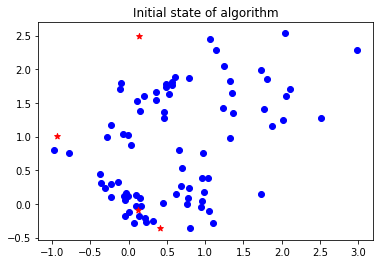

In [144]:
# Plot of the initial conditions

plt.scatter(X[:,0],X[:,1],color='blue')
plt.scatter(centers[:,0],centers[:,1],color = 'red',marker = '*')
plt.title('Initial state of algorithm')

Now we need pairwise distances between each point and each centre. This can also be done with a built-in package, but instead we will use the efficient implementation that comes from Sourav Dey (https://medium.com/@souravdey/l2-distance-matrix-vectorization-trick-26aa3247ac6c) who does a good job explaining how to use this

Text(0.5, 1.0, 'After the first assignment')

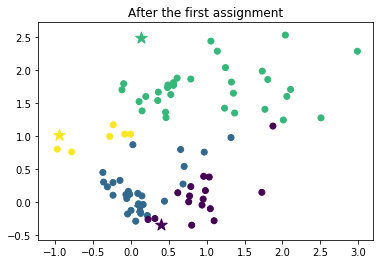

In [145]:
# We want to go from an 80 by 2 and 4 by 2 matrix to a 80x4 matrix and then 
# Take only the minimum of each row and assign it to that center

# Find all the distrnaces to the nearest centre
dists = -2 * np.dot(X, centers.T) + np.sum(centers**2,axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
# Assign to the closest cluster
assignments = np.argmin(dists,axis = 1)

plt.scatter(X[:,0],X[:,1],c=assignments)
plt.scatter(centers[:,0],centers[:,1],c  = np.arange(NUMBER_OF_CENTERS),marker = '*',s = 150)
plt.title('After the first assignment')

As we can see the points are all assigned to their nearest centre (the stars)
But the stars don't really seem to be well placed (if we compare with the true state of the world that we saw above)
So we iterate through this by recalculating the centres as the average of these clusters.

We then repeat the assignment steps and calculation of centers steps until the centers are not changing all that much.

Then we can assess how we are doing

You can stop now


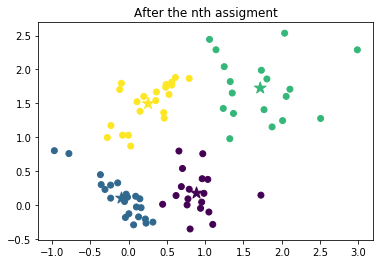

In [158]:
new_centers = np.array([X[assignments==i,:].mean(0) for i in range(NUMBER_OF_CENTERS)])
epsilon = 0.01
if np.all(new_centers-centers<epsilon):
  print("Process has converged: you can stop now")

centers = new_centers
plt.scatter(X[:,0],X[:,1],c=assignments)
plt.scatter(centers[:,0],centers[:,1],c  = np.arange(NUMBER_OF_CENTERS),marker = '*',s = 150)
plt.title('After the nth assigment')

# Find all the distrnaces to the nearest centre
dists = -2 * np.dot(X, centers.T) + np.sum(centers**2,axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
# Assign to the closest cluster
assignments = np.argmin(dists,axis = 1)
